In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.linalg import svd

In [2]:
with open('../graphs/export_graphs.pkl', 'rb') as file:
    export_graphs = pkl.load(file)

In [3]:
def frobenius_distance(G1, G2):
    """
    Computes Frobenius distance between two graphs using the Frobenius norm.

    Parameters   
    G1, G2 (nx.Graph) : Graphs to compare
    Returns
    frobenius_distance (float) : frobenius distance between the two graphs
    """
    # Assuming 'G1' and 'G2' are your graphs
    w1 = nx.adjacency_matrix(G1.to_undirected()).toarray()
    w2 = nx.adjacency_matrix(G2.to_undirected()).toarray()

    w_diff = w1 - w2
    frobenius_distance = np.linalg.norm(w_diff, 'fro')
    return frobenius_distance

In [4]:
def pairwise_distance(graphs, dist_type):
    """
    Create pairwise matrix which contains the distance for every pair of graphs

    #Parameters
    graphs - list of graphs
    dist_type - specified distance function
    """
    i = len(graphs)
    distances = np.zeros(shape=(i,i))
    for i in range(len(graphs)):
        for j in range(len(graphs)):
            distances[i][j] = dist_type(graphs[i], graphs[j])
    return distances

In [5]:
with open('../distances/frobenius_distance_exports.pkl', 'rb') as file:
    frob_exports = pkl.load(file)

In [40]:
# For each graph, get the 5 graphs most similar to it
most_similar_graphs = [list(frob_exports[i].argsort()[1:3]) for i in range(frob_exports.shape[0])]

print(most_similar_graphs)

[[2, 4], [4, 2], [4, 0], [5, 6], [2, 0], [6, 3], [5, 3], [1, 4], [37, 6], [6, 4], [6, 37], [21, 22], [20, 23], [12, 20], [6, 37], [9, 6], [11, 21], [18, 13], [19, 17], [20, 23], [23, 12], [22, 11], [21, 11], [20, 19], [28, 4], [6, 37], [29, 27], [26, 29], [24, 4], [26, 27], [37, 35], [32, 6], [31, 6], [37, 36], [35, 36], [34, 36], [35, 34], [36, 34], [39, 41], [38, 40], [41, 39], [40, 42], [41, 40], [42, 41], [45, 46], [46, 44], [45, 47], [48, 46], [47, 46], [50, 59], [49, 59], [52, 53], [53, 54], [52, 54], [53, 52], [56, 54], [55, 57], [56, 55], [59, 49], [58, 49]]


Calculate test statistic to see if subgraphs belong to same group when break is at time t

n = group 1 (before t)

n' = group 2 (at or after t)

In [55]:
# Divide sequence of graphs into two groups - before and after time t
N = len(export_graphs)
r_stat = []
for t in range(1,N):
    group_1 = range(t)
    group_2 = range(t,N)

    # b = 1 if at time t, graph 1 and graph 2 belong to two different time periods
    b_t = 0
    for n in group_1:
        for n_prime in group_2:
            knn_n_prime = most_similar_graphs[n_prime]
            knn_n = most_similar_graphs[n]
                  
            s_n_prime = 1 if n_prime in knn_n else 0
            s_n = 1 if n in knn_n_prime else 0
            b_t += 1 if (s_n_prime==0 and s_n == 0) else 0
    
    k = 3
    e_r = (4*k*(N-t))/(N-1)
    h = (4*(t-1)*(N-t-1))/((N-2)*(N-3))

    second_term = 0
    fourth_term = 0
    for n in range(N):
        second_term += (1 + k - ((2*(k**2))/(N-1)))
        fourth_term += (1-k**2)

    second_term = (1/N)*second_term
    fourth_term = (1/N)*fourth_term

    third_term = (1-h)

    var = abs((e_r*h*second_term)+third_term+fourth_term)

    r_stat.append(-abs(b_t-e_r)/math.sqrt(var))


In [61]:
t_range = range(1963,2022)

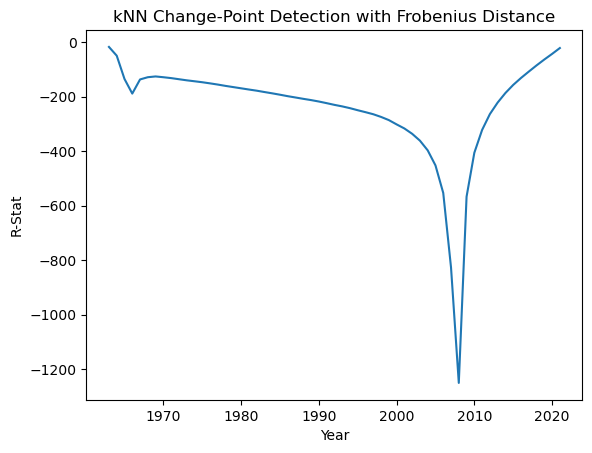

In [62]:
# Create a line graph of r_stat
plt.plot(t_range,r_stat)
plt.title('kNN Change-Point Detection with Frobenius Distance')
plt.xlabel('Year')
plt.ylabel('R-Stat')
plt.show()